## Getting Rid of Field Stars

-----------------
Author: Erin Motherway
Date: 7/6/2022

This notebook reads in a phot file, plots a CMD, and allows for the elimination of stars under a chosen cuttoff line. 

In [178]:
#import packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [161]:
#read in phot file
photData = pd.read_csv('M35.phot',delim_whitespace=True)
df = pd.DataFrame(photData)
display(df)

,id,G,G_BP,G_RP,g_ps,r_ps,i_ps,z_ps,y_ps,J_2M,...,sigz_ps,sigy_ps,sigJ_2M,sigH_2M,sigKs_2M,mass1,massRatio,stage1,CMprior,useDBI
0,104690001,7.1089,7.6815,6.3897,99.9,99.9000,99.9000,99.9000,99.9000,5.487,...,-9.9000,-9.9000,0.020,0.018,0.021,0.0,0.0,1,0.218,1
1,112170002,8.0647,8.7978,7.2314,99.9,99.9000,99.9000,99.9000,99.9000,6.064,...,-9.9000,-9.9000,0.024,0.026,0.018,0.0,0.0,1,0.253,1
2,102500003,8.0688,8.8100,7.2298,99.9,99.9000,99.9000,99.9000,99.9000,6.033,...,-9.9000,-9.9000,0.019,0.018,0.018,0.0,0.0,1,0.232,1
3,100800004,8.1395,8.1613,8.0379,99.9,99.9000,99.9000,99.9000,99.9000,7.982,...,-9.9000,-9.9000,0.023,0.020,0.016,0.0,0.0,1,0.511,1
4,106970005,8.6999,8.7546,8.5510,99.9,99.9000,99.9000,99.9000,99.9000,8.398,...,-9.9000,-9.9000,0.019,0.015,0.024,0.0,0.0,1,0.556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,109309212,99.9000,99.9000,16.6659,99.9,99.9000,99.9000,99.9000,99.9000,99.900,...,-9.9000,-9.9000,-9.900,-9.900,-9.900,0.0,0.0,1,0.404,1
9212,107209213,99.9000,99.9000,18.9307,99.9,20.8538,19.5612,19.0379,18.7342,99.900,...,0.0274,0.0290,-9.900,-9.900,-9.900,0.0,0.0,1,0.980,1
9213,142869214,99.9000,99.9000,17.2763,99.9,99.9000,99.9000,99.9000,99.9000,99.900,...,-9.9000,-9.9000,-9.900,-9.900,-9.900,0.0,0.0,1,0.147,1
9214,109699215,99.9000,99.9000,99.9000,99.9,99.9000,99.9000,99.9000,99.9000,99.900,...,-9.9000,-9.9000,-9.900,-9.900,-9.900,0.0,0.0,1,0.190,1


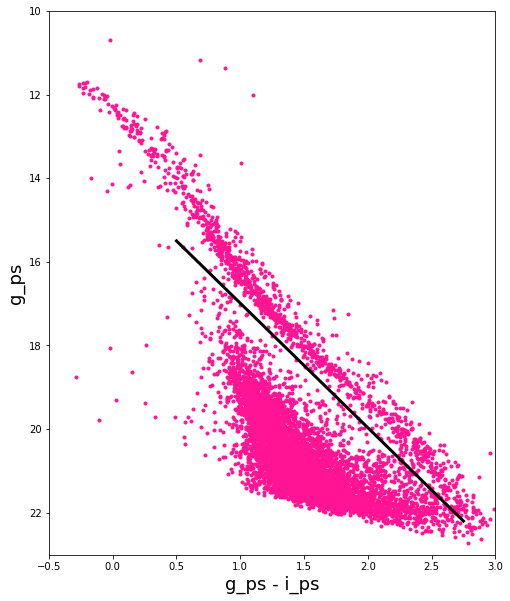

In [175]:
# plot CMD 
f, ax = plt.subplots(figsize=(8,10))
ax.plot(df['g_ps']-df['i_ps'],df['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)

#plot cuttoff line by guessing x and y values
x1=0.5
x2=2.75
y1=15.5
y2=22.2
ax.plot((x1, x2),(y1,y2),color='k',linewidth=3)


In [177]:
# print slope and intercept
m = (y2-y1)/(x2-x1)

print('The slope value for this line is',m)

b = y1 - m*x1

print('The intercept for this line is',b)


The slope value for this line is 2.9777777777777774 .
The intercept for this line is 14.011111111111111 .


In [ ]:
#copy this onto command line in gitbash with changed m and b values
#cat M35.phot | awk '{if (NR == 1 || $5 < m*($5 - $7) + b) print $0}' > M35.new.phot

In [172]:
#read in new phot file
newPhotData = pd.read_csv('M35.new.phot',delim_whitespace=True)
df2 = pd.DataFrame(newPhotData)

Text(0, 0.5, 'g_ps')

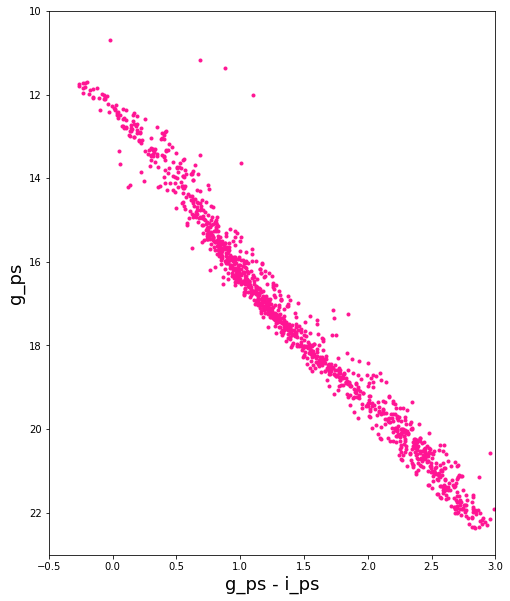

In [176]:
#plot new CMD
f, ax = plt.subplots(figsize=(8,10))
ax.plot(df2['g_ps']-df2['i_ps'],df2['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)